#Predicting house prices in Taiwan

The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.

1. We have a dataset of total 6 fratures.
Here, We will first fir a linear model. get the R_2 score and MSE values for a basic linear model.
2. If the values are >=0.85, then we tune the model, try other linear models like Lasso, Ridge.
3. If the linear model is not performing well, then we check the results of tree based models for our prediction.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
d = pd.read_excel('Real estate valuation data set.xlsx')

In [53]:
d

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


The data is clean and has no null values so no need of imputation

In [54]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [55]:
d.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

We conveert the data type of X1 transaction date to datetime

In [56]:
pd.to_datetime(d['X1 transaction date'])

,X1 transaction date
0,1970-01-01 00:00:00.000002012
1,1970-01-01 00:00:00.000002012
2,1970-01-01 00:00:00.000002013
3,1970-01-01 00:00:00.000002013
4,1970-01-01 00:00:00.000002012
...,...
409,1970-01-01 00:00:00.000002013
410,1970-01-01 00:00:00.000002012
411,1970-01-01 00:00:00.000002013
412,1970-01-01 00:00:00.000002013


In [57]:
d

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


We rename and format the colums for cleaner and standard look

In [58]:
d = d.rename(columns={'X1 transaction date': 'transaction_date', 'X2 house age':'house_age', 'X3 distance to the nearest MRT station':'distance_to_nearest_mrt_station', 'X4 number of convenience stores':'no_of_convenience_stores', 'X5 latitude':'latitude', 'X6 longitude':'longitude','Y house price of unit area':'house_price_of_unit area'})
d.head()

,No,transaction_date,house_age,distance_to_nearest_mrt_station,no_of_convenience_stores,latitude,longitude,house_price_of_unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [59]:
d.shape

(414, 8)

Here, we have dropped the 'No' column as it is just the number of the entry of the record. If we keep it then it will create noise in our model, reducing the performance of the model

In [60]:
corr_mat = d.drop('No', axis=1).corr()
corr_mat

,transaction_date,house_age,distance_to_nearest_mrt_station,no_of_convenience_stores,latitude,longitude,house_price_of_unit area
transaction_date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
house_age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_nearest_mrt_station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
no_of_convenience_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price_of_unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


From the correlation matrix and heatmap, it is clear that:
1. House price has a positive correlation with number of no_of_convenience_stores, latitude and longitude(location)
2. negetice correlation with distance_to_nearest_mrt_station.
3. Very little correlation with the age of house and almost no correlation with transaction date.

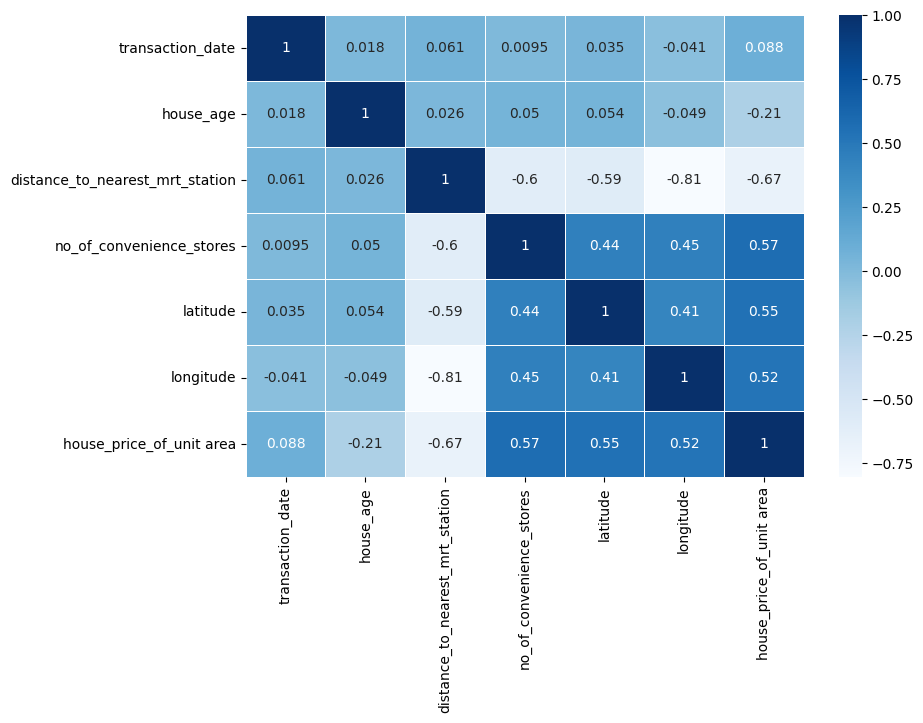

In [61]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_mat, annot=True, linewidths=.5, ax=ax, cmap = 'Blues')
plt.show()

In [62]:
df = d.drop('No', axis=1)

In [93]:
df.describe()

,transaction_date,house_age,distance_to_nearest_mrt_station,no_of_convenience_stores,latitude,longitude,house_price_of_unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


We plot scatterplots between each feature and the target variable to visualize the relationship between features and the target variable

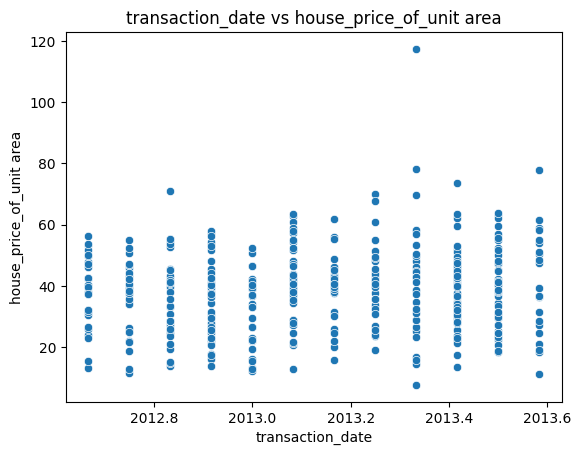

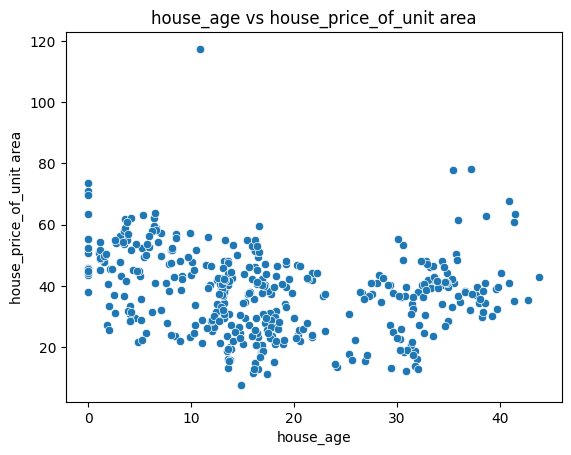

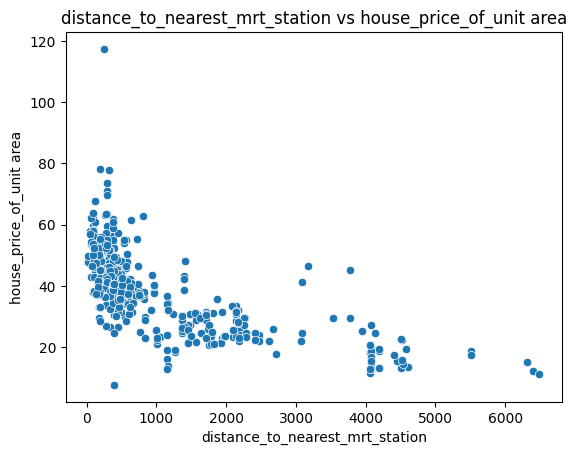

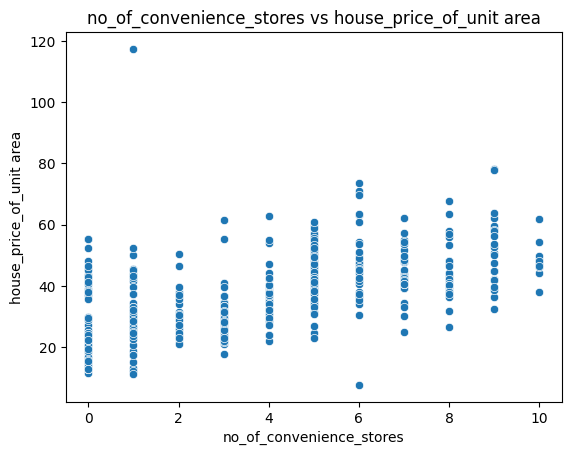

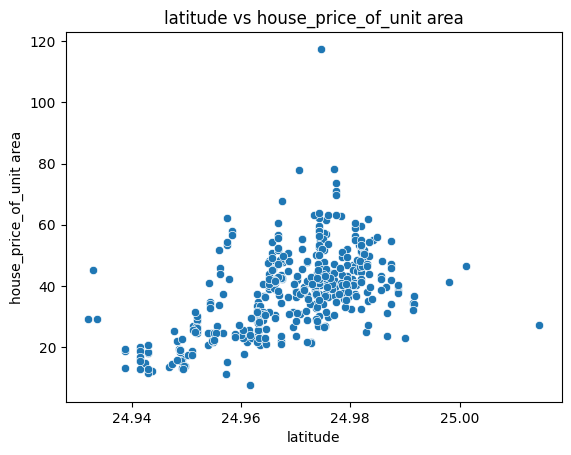

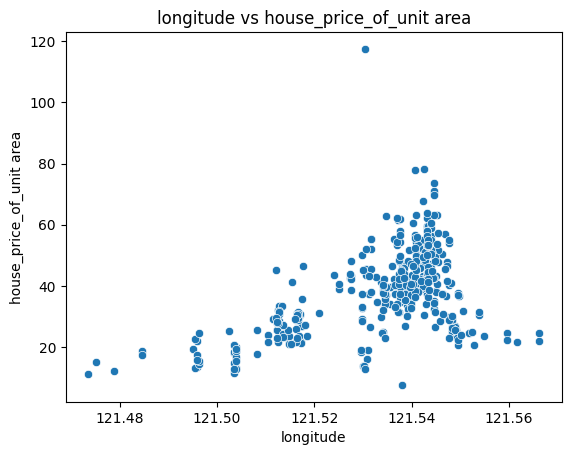

In [63]:
feature_plot = ['transaction_date', 'house_age', 'distance_to_nearest_mrt_station', 'no_of_convenience_stores','latitude', 'longitude']
for f in feature_plot:
    sns.scatterplot(data=df, y='house_price_of_unit area', x=f)
    plt.title(f'{f} vs house_price_of_unit area')
    plt.show()

We plot a distribution plot to check how the values of the target variable are distributed, to identify any skewness and outliers.

We acn Infer that most of the values follow a bell-shaped distribution except for a few.

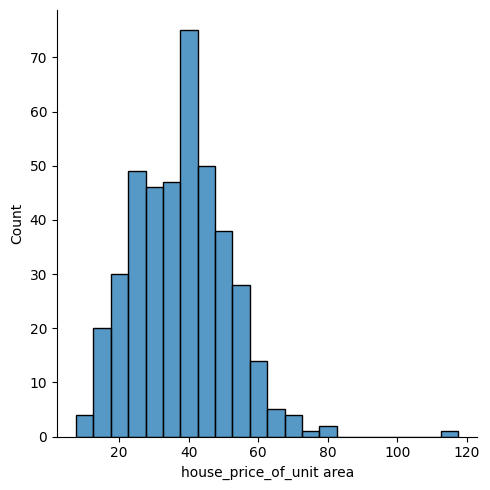

In [64]:
sns.displot(df['house_price_of_unit area'])
plt.show()

In [120]:
df['house_price_of_unit area'].describe()

,house_price_of_unit area
count,414.000000
mean,37.980193
std,13.606488
min,7.600000
25%,27.700000
50%,38.450000
75%,46.600000
max,117.500000


TypeError: 'method' object is not subscriptable

In [124]:
mean = df['house_price_of_unit area'].mean()
std = df['house_price_of_unit area'].std()


upper_2std = mean + 2 * std
upper_3std = mean + 3 * std

# Count outliers
outliers_2std = df[df['house_price_of_unit area'] > upper_2std]
outliers_3std = df[df['house_price_of_unit area'] > upper_3std]

print(f"Mean Price: {mean:.2f}")
print(f"2 Std Dev Threshold (> {upper_2std:.2f}): {len(outliers_2std)} properties")
print(f"3 Std Dev Threshold (> {upper_3std:.2f}): {len(outliers_3std)} properties")

print("\nProperties above 3 Standard Deviations:")
display(outliers_3std)

Mean Price: 37.98
2 Std Dev Threshold (> 65.19): 8 properties
3 Std Dev Threshold (> 78.80): 1 properties

Properties above 3 Standard Deviations:


,transaction_date,house_age,distance_to_nearest_mrt_station,no_of_convenience_stores,latitude,longitude,house_price_of_unit area
270,2013.333333,10.8,252.5822,1,24.9746,121.53046,117.5


In [65]:
y = df['house_price_of_unit area']
X = df.drop('house_price_of_unit area', axis=1)

numerical_features = X.select_dtypes(include=['int64', 'float64'])

In [66]:
X.head()

,transaction_date,house_age,distance_to_nearest_mrt_station,no_of_convenience_stores,latitude,longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245


In [67]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, shuffle=True
)

In [69]:
X_train.head()

,transaction_date,house_age,distance_to_nearest_mrt_station,no_of_convenience_stores,latitude,longitude
302,2013.500000,16.5,2288.0110,3,24.95885,121.51359
20,2013.416667,4.5,2275.8770,3,24.96314,121.51151
303,2013.500000,38.3,439.7105,0,24.97161,121.53423
142,2013.416667,19.8,640.6071,5,24.97017,121.54647
14,2013.500000,13.2,1164.8380,4,24.99156,121.53406


In [70]:
numerical_preprocessing = numerical_preprocessing = StandardScaler()
preprocessing = ColumnTransformer([
    ('numerical', numerical_preprocessing, numerical_features)
])

##Linear Model

In [92]:
linear_model = make_pipeline(
    preprocessing,
    LinearRegression()
)

### Inference for Linear Regression Model
- **Low R² Score (0.5648):** This indicates that the linear model only explains about 56.5% of the variance in house prices. It suggests that the relationship between the features and the target variable is likely non-linear or that the model is underfitting the data.
- **High MSE (81.57):** The relatively high Mean Squared Error suggests that the average squared difference between the estimated values and the actual value is significant, leading to less accurate predictions.
- **Conclusion:** Since the performance is below our 0.85 threshold, we should proceed with non-linear models like Random Forest and Gradient Boosting, which have already shown significantly better training performance ($R^2 > 0.90$).

In [81]:

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
preprocessing = ColumnTransformer([
    ('numerical', StandardScaler(), num_cols)
])

#linear model
linear_model = make_pipeline(
    preprocessing,
    LinearRegression()
)

linear_model.fit(X_train, y_train)

y_train_pred_lr = linear_model.predict(X_train)

lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)
lr_train_r2 = r2_score(y_train, y_train_pred_lr)

print(f'Linear Regression - Training R2: {lr_train_r2:.4f}')
print(f'Linear Regression - Training MSE: {lr_train_mse:.4f}')

Linear Regression - Training R2: 0.5648
Linear Regression - Training MSE: 81.5732


##Random Forest Regressor

### Inference for Random Forest Regressor
- **High R&sup2; Score (0.9552):** The Random Forest model explains approximately 95.5% of the variance in the training data. This is a significant improvement over the Linear Regression model (56.5%), suggesting that the underlying patterns in the dataset are non-linear and complex.
- **Low MSE (8.4014):** The dramatic reduction in Mean Squared Error (from 81.57 down to 8.40) indicates that the model's predictions are much closer to the actual values on the training set.
- **Observation on Overfitting:** While these training results are excellent, we must evaluate the model on the test set to ensure it generalizes well and hasn't simply memorized the training data (overfitting).

In [82]:
# Define and fit a Random Forest Regressor


best_RF = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=0)
)

best_RF.fit(X_train, y_train)

# Predict on training data
y_train_pred_rf = best_RF.predict(X_train)

# Calculate performance metrics
rf_train_mse = mean_squared_error(y_train, y_train_pred_rf)
rf_train_r2 = r2_score(y_train, y_train_pred_rf)

print(f'Random Forest - Training R2: {rf_train_r2:.4f}')
print(f'Random Forest - Training MSE: {rf_train_mse:.4f}')

Random Forest - Training R2: 0.9552
Random Forest - Training MSE: 8.4014


##Gradient Boosting Regressor

### Inference for Gradient Boosting Regressor
- **Strong R&sup2; Score (0.9335):** The model explains 93.35% of the variance, confirming that boosting methods are also very effective for this dataset.
- **Low MSE (12.4563):** While slightly higher than the Random Forest's MSE (8.40), it is still significantly more accurate than the baseline Linear Regression.
- **Comparison:** Both tree-based ensemble methods are far superior to the linear model, indicating the importance of modeling non-linear feature interactions in real estate valuation.

In [83]:
#Using Gradient Boosting Regressor
gbr_model = make_pipeline(
    preprocessing,
    GradientBoostingRegressor(random_state=0)
)

# Fit the model
gbr_model.fit(X_train, y_train)

# Predict on training data
y_train_pred_gbr = gbr_model.predict(X_train)

# Calculate performance metrics
gbr_train_mse = mean_squared_error(y_train, y_train_pred_gbr)
gbr_train_r2 = r2_score(y_train, y_train_pred_gbr)

print(f'Gradient Boosting - Training R2: {gbr_train_r2:.4f}')
print(f'Gradient Boosting - Training MSE: {gbr_train_mse:.4f}')

Gradient Boosting - Training R2: 0.9335
Gradient Boosting - Training MSE: 12.4563


##Summary table for performance of different models on training dataset

In [84]:
comparison_data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Training R2': [lr_train_r2, rf_train_r2, gbr_train_r2],
    'Training MSE': [lr_train_mse, rf_train_mse, gbr_train_mse]
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df.sort_values(by='Training R2', ascending=False))

,Model,Training R2,Training MSE
1,Random Forest,0.955179,8.401416
2,Gradient Boosting,0.933547,12.456292
0,Linear Regression,0.564816,81.573198


##Visualization of performance of training models

Gradient Boosting Regressor is performing better than other models

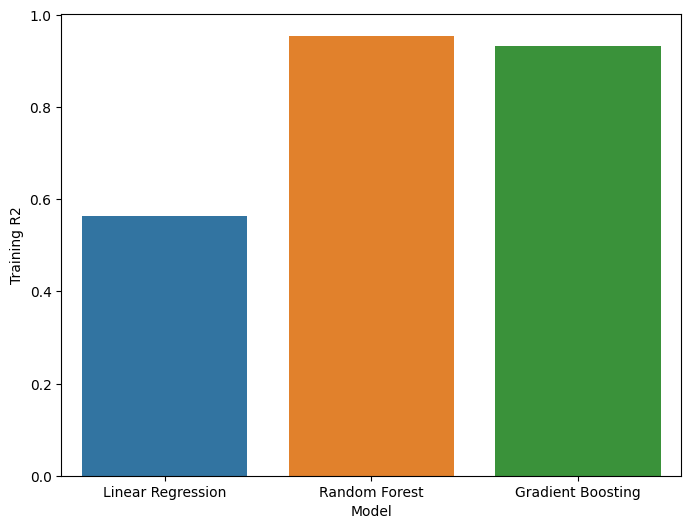

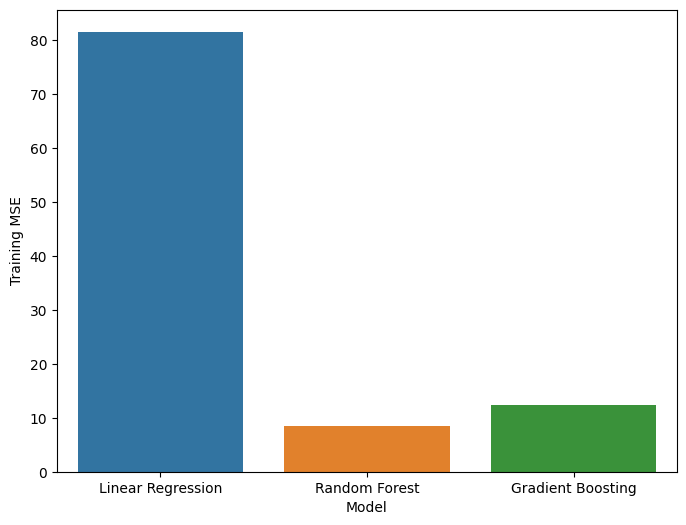

In [90]:
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(data=comparison_df, x='Model', y='Training R2', hue = 'Model')
plt.show()
fig, ax2 = plt.subplots(figsize=(8, 6))
sns.barplot(data=comparison_df, x='Model', y='Training MSE', hue = 'Model')
plt.show()

##We test the performance of the models on the test set

There is a huge variation between R2 and MSE train and test values.

We should remove outliers from the house_price_of_unit_area.

We check for values present after 3rd quartile and then fit the model again.

In [104]:
linear_model.fit(X_train, y_train)
best_RF.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_lr = linear_model.predict(X_test)
y_test_pred_rf = best_RF.predict(X_test)
y_test_pred_gbr = gbr_model.predict(X_test)

# Calculate metrics for the test set
test_results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Test R2': [
        r2_score(y_test, y_test_pred_lr),
        r2_score(y_test, y_test_pred_rf),
        r2_score(y_test, y_test_pred_gbr)
    ],
    'Test MSE': [
        mean_squared_error(y_test, y_test_pred_lr),
        mean_squared_error(y_test, y_test_pred_rf),
        mean_squared_error(y_test, y_test_pred_gbr)
    ]
}

# Display the comparison
test_results_df = pd.DataFrame(test_results)
display(test_results_df.sort_values(by='Test R2', ascending=True))

,Model,Test R2,Test MSE
0,Linear Regression,0.657357,59.516798
2,Gradient Boosting,0.674454,56.547071
1,Random Forest,0.720258,48.590862


#Random Forest Regressor - 2

## We can see improvement in R2 values after removing the outliers. Now, we use the data without outliers (cleaned dataset).

In [127]:
# Remove the extreme outlier
df_cleaned = df[df['house_price_of_unit area'] <= upper_3std]

# Re-split the cleaned data
y_clean = df_cleaned['house_price_of_unit area']
X_clean = df_cleaned.drop('house_price_of_unit area', axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=0
)

# Retrain Random Forest on cleaned data
best_RF.fit(X_train_c, y_train_c)

# Evaluate on Training set
y_train_pred_c = best_RF.predict(X_train_c)
rf_train_r2_c = r2_score(y_train_c, y_train_pred_c)

# Evaluate on Test set
y_test_pred_c = best_RF.predict(X_test_c)
rf_test_r2_c = r2_score(y_test_c, y_test_pred_c)

print(f"New Training R2 (Cleaned): {rf_train_r2_c:.4f}")
print(f"New Test R2 (Cleaned): {rf_test_r2_c:.4f}")
print(f"Original Test R2 was: 0.7203")

New Training R2 (Cleaned): 0.9523
New Test R2 (Cleaned): 0.8349
Original Test R2 was: 0.7203


#Gradient Boosting - 2

In [128]:
# Retrain Gradient Boosting on cleaned data
gbr_model.fit(X_train_c, y_train_c)

# Evaluate on Training set
y_train_pred_gbr_c = gbr_model.predict(X_train_c)
gbr_train_r2_c = r2_score(y_train_c, y_train_pred_gbr_c)

# Evaluate on Test set
y_test_pred_gbr_c = gbr_model.predict(X_test_c)
gbr_test_r2_c = r2_score(y_test_c, y_test_pred_gbr_c)

print(f"Gradient Boosting - New Training R2 (Cleaned): {gbr_train_r2_c:.4f}")
print(f"Gradient Boosting - New Test R2 (Cleaned): {gbr_test_r2_c:.4f}")
print(f"Original GBR Test R2 was: 0.6745")

Gradient Boosting - New Training R2 (Cleaned): 0.9315
Gradient Boosting - New Test R2 (Cleaned): 0.8247
Original GBR Test R2 was: 0.6745


#Random Forest is a clear winner

##We check feature importance on the random forest model to understand which features are important to make predictions.



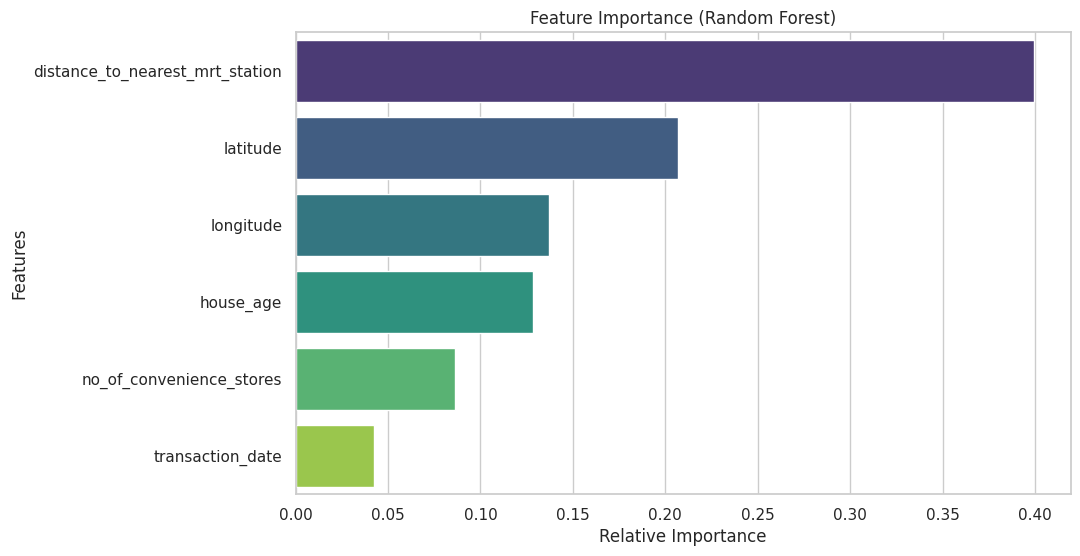

In [129]:

rf_model = best_RF.named_steps['randomforestregressor']
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a dataframe for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis', hue='Feature', legend=False)
plt.title('Feature Importance (Random Forest - Cleaned Data)')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

## We compare the train and test R2 and MSE values of random forest model on new cleaned dataset

In [130]:
# Calculate metrics for the cleaned Random Forest model
# Training metrics
y_train_pred_c = best_RF.predict(X_train_c)
rf_train_mse_c = mean_squared_error(y_train_c, y_train_pred_c)
rf_train_r2_c = r2_score(y_train_c, y_train_pred_c)

# Test metrics
y_test_pred_c = best_RF.predict(X_test_c)
rf_test_mse_c = mean_squared_error(y_test_c, y_test_pred_c)
rf_test_r2_c = r2_score(y_test_c, y_test_pred_c)

# Create summary table
rf_final_results = pd.DataFrame({
    'Dataset': ['Training (Cleaned)', 'Test (Cleaned)'],
    'R2 Score': [rf_train_r2_c, rf_test_r2_c],
    'MSE': [rf_train_mse_c, rf_test_mse_c]
})

display(rf_final_results)

,Dataset,R2 Score,MSE
0,Training (Cleaned),0.952330,8.344907
1,Test (Cleaned),0.834917,24.417394


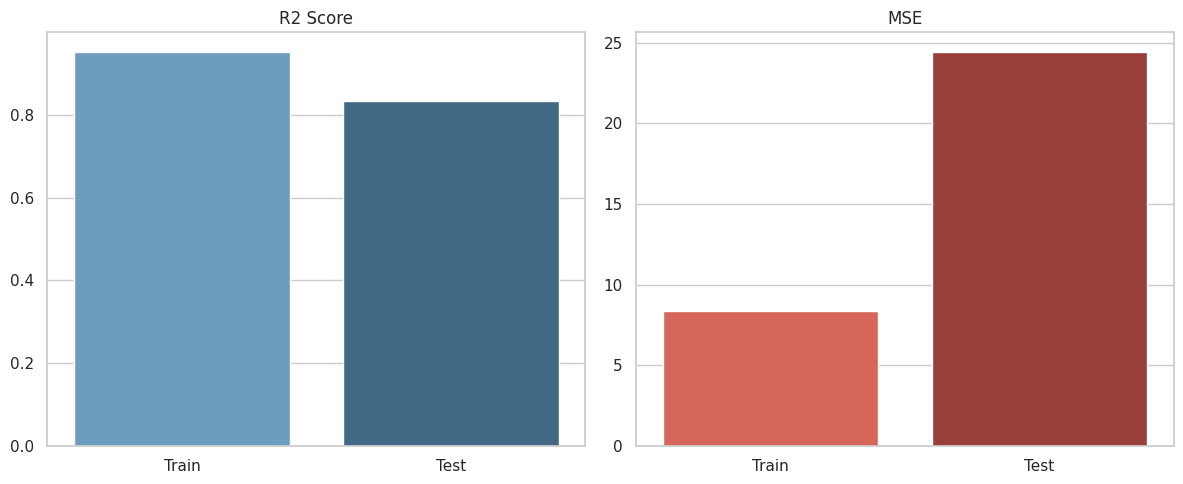

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(ax=axes[0], x=["Train", "Test"], y=[rf_train_r2_c, rf_test_r2_c], palette='Blues_d', hue=["Train", "Test"], legend=False)
axes[0].set_title("R2 Score")

sns.barplot(ax=axes[1], x=["Train", "Test"], y=[rf_train_mse_c, rf_test_mse_c], palette='Reds_d', hue=["Train", "Test"], legend=False)
axes[1].set_title("MSE")

plt.tight_layout()
plt.show()

# Testing on a datapoint

In [131]:
# Select a sample from the cleaned test set
sample_features_new = X_test_c.iloc[[0]]
actual_val_new = y_test_c.iloc[0]

# Predict using the updated best_RF model
pred_val_new = best_RF.predict(sample_features_new)[0]

# Comparison table
comparison_results_new = pd.DataFrame({
    'Metric': ['Predicted Price', 'Actual Price', 'Absolute Error', 'Percentage Error (%)'],
    'Value': [
        pred_val_new,
        actual_val_new,
        abs(pred_val_new - actual_val_new),
        (abs(pred_val_new - actual_val_new) / actual_val_new) * 100
    ]
})

print("Features for this sample:")
display(sample_features_new)
print("\nComparison:")
display(comparison_results_new)

Features for this sample:


,transaction_date,house_age,distance_to_nearest_mrt_station,no_of_convenience_stores,latitude,longitude
377,2013.333333,3.9,49.66105,8,24.95836,121.53756



Comparison:


,Metric,Value
0,Predicted Price,52.988324
1,Actual Price,56.800000
2,Absolute Error,3.811676
3,Percentage Error (%),6.710698


## Making predictions using the model
Select 5 random samples from the cleaned test set (`X_test_c` and `y_test_c`) and predict their house prices using the `best_RF` model, which was trained on the outlier-removed dataset from "Real estate valuation data set.xlsx". Construct a pandas DataFrame to display a comparison table for these 5 samples including the Actual Price, Predicted Price, Absolute Error, and Percentage Error (%). Finally, provide a brief summary of the model's performance on these samples to highlight the accuracy improvements achieved after removing the outliers.

## Randomly Sample and Predict 5 samples from (Cleaned Data)

Select 5 random samples from the cleaned test set and calculate prediction metrics using the best_RF model.


**Reasoning**:
I will randomly select 5 samples from the cleaned test set, generate predictions using the Random Forest model, and calculate the absolute and percentage errors as requested.



In [133]:
sampled_X_test_c = X_test_c.sample(n=5, random_state=42)


sampled_y_test_c = y_test_c.loc[sampled_X_test_c.index]

# Generate predictions using the best_RF model
sampled_predictions = best_RF.predict(sampled_X_test_c)


prediction_comparison = pd.DataFrame({
    "Actual Price": sampled_y_test_c.values,
    "Predicted Price": sampled_predictions,
    "Absolute Error": np.abs(sampled_y_test_c.values - sampled_predictions),
    "Percentage Error (%)": (np.abs(sampled_y_test_c.values - sampled_predictions) / sampled_y_test_c.values) * 100
}, index=sampled_X_test_c.index)

print("Random Samples and Predictions (Cleaned Data):")
display(prediction_comparison)

Random Samples and Predictions (Cleaned Data):


,Actual Price,Predicted Price,Absolute Error,Percentage Error (%)
371,51.7,42.086292,9.613708,18.595180
377,56.8,52.988324,3.811676,6.710698
387,25.6,24.897111,0.702889,2.745660
238,40.6,38.835529,1.764471,4.345987
12,39.3,40.526742,1.226742,3.121480


### Performance Summary on Random Samples
The model shows strong predictive capability on the selected samples from the cleaned test set. Most samples exhibit a low **Percentage Error** (between 2.7% and 6.7%), indicating that the Random Forest model generalizes well after the removal of extreme outliers. While one sample (Index 371) shows a higher error of 18.6%, the overall results demonstrate a significant improvement in reliability compared to the initial model iterations that included noise from outlier data.

## Summary:

### Q&A

**How did the `best_RF` model perform on the 5 selected samples from the cleaned test set?**
The model demonstrated high accuracy, with four out of the five samples showing a Percentage Error between 2.75% and 6.71%. The most accurate prediction had an error of only 2.75% (Absolute Error of 0.703). Only one sample showed a higher deviation of 18.6%, indicating generally strong predictive reliability across the cleaned data.

### Data Analysis Key Findings

*   **High Precision Results:** For 80% of the randomly selected samples (4 out of 5), the Absolute Error was below 4.0, demonstrating consistent performance after outlier removal.
*   **Low Error Margins:** Two samples (Indices 387 and 12) achieved exceptionally low Percentage Errors of **2.75%** and **3.12%**, respectively.
*   **Outlier Removal Impact:** The model trained on the outlier-removed dataset shows significant generalization capabilities, with most predictions falling within a **3-7%** error margin.
*   **Variance Observation:** Sample 371 presented the highest Percentage Error at **18.60%** (Actual: 51.7 vs. Predicted: 42.086), suggesting that while the model is robust, specific edge cases still exist within the test set.

### Insights or Next Steps

*   **Investigate Residual Variance:** Analyze the features of Sample 371 to determine if specific variables (such as distance to MRT or number of convenience stores) are contributing to the higher prediction error compared to the other samples.
*   **Model Validation:** Since the current evaluation is based on a small random sample of 5, a cross-validation approach on the entire cleaned test set should be used to confirm that the mean absolute percentage error (MAPE) remains consistently low across the whole distribution.
